In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import keras
import math
from matplotlib import pyplot as plt

class ML_Seq:
    def __init__(self, input_sequence_length,output_sequence_length,batch_size):
        self.input_sequence_length = input_sequence_length
        self.output_sequence_length = output_sequence_length
        self.window_size=input_sequence_length+output_sequence_length
        self.batch_size = batch_size
        
        self.layers = [35, 35, 35]
        self.learning_rate = 0.01
        self.decay = 0 # Learning rate decay
        
        self.series = None
        self.scaler = None
        
    def LoadSequenceData(self, df):
        #normalize data between 0 and 1
        from sklearn.preprocessing import MinMaxScaler
        values = df['close'].values.reshape(-1, 1)###for single features
        self.scaler = MinMaxScaler(feature_range=(0, 1))
        self.scaler = self.scaler.fit(values)
        normalized = self.scaler.transform(values)
        df['x'] = normalized
        
        series = df.x
        series_s = series.copy()

        for i in range(self.window_size-1):
            series = pd.concat([series,series_s.shift(-(i+1))],axis=1)
            
        series.dropna(inplace=True)
        self.series = series
        
    def fit(self, epochs=5):
        self._define_model()
        train_data_generator = self._generateTrainingData()
        steps_per_epoch = math.ceil(len(df) / mlseq.batch_size)
        #model.fit_generator(train_data_generator, steps_per_epoch=None, epochs=epochs)
        self.model.fit_generator(train_data_generator, steps_per_epoch=steps_per_epoch ,epochs=epochs)
        
    def predict(self):
        a=1
        
    def plot_Training_Predictions(self,isRescale = True):
        #PREDICT
        [encoder_input, decoder_input], decoder_output = next(self._generateTrainingData())
        y_test_predicted = self.model.predict([encoder_input, decoder_input])

        inputs = encoder_input.shape[0]
        for i in range(inputs):
            
            if isRescale:
                past = mlseq.scaler.inverse_transform(encoder_input[i])
                true = mlseq.scaler.inverse_transform(decoder_output[i])
                pred = mlseq.scaler.inverse_transform(y_test_predicted[i])
            else:
                past = encoder_input[i]
                true = decoder_output[i]
                pred = y_test_predicted[i]

            plt.figure(figsize=(12, 3))

            plt.plot(range(len(past)), past, "o--b",label="Past")
            plt.plot(range(len(past),len(true)+len(past)), true, "x--b", label="True_Future")
            plt.plot(range(len(past), len(pred)+len(past)), pred, "o--y",label="Forecasted")

            plt.legend(loc='best')
            plt.title("Predictions v.s. true values")
            plt.show()

    def _splitDataFrameIntoSmaller(self, df, chunkSize = None):
        if chunkSize == None:
            chunkSize=self.batch_size
        
        listOfDf = list()
        numberChunks = len(df) // chunkSize + 1
        for i in range(numberChunks):
            listOfDf.append(df[i*chunkSize:(i+1)*chunkSize])
        return listOfDf
    
    def _generateTrainingData(self):
        b = self._splitDataFrameIntoSmaller(mlseq.series,chunkSize=self.batch_size)
        
        while True:
            for series_rows in b[0:2]:
                xc = series_rows.iloc[:,0:self.input_sequence_length].values
                yc = series_rows.iloc[:,self.input_sequence_length:].values

                encoder_input = xc.reshape(xc.shape[0],xc.shape[1],1)
                decoder_output = yc.reshape(yc.shape[0],yc.shape[1],1)
                decoder_input = np.zeros((decoder_output.shape[0], decoder_output.shape[1], 1))   
                yield ([encoder_input, decoder_input], decoder_output)
                
                
    def _define_model(self):
        num_input_features = 1 # The dimensionality of the input at each time step. In this case a 1D signal.
        num_output_features = 1 # The dimensionality of the output at each time step. In this case a 1D signal.
        layers = [60,60,60] # Number of hidden neuros in each layer of the encoder and decoder
        # Regularisation isn't really needed for this application
        lambda_regulariser = 0.000001 # Will not be used if regulariser is None
        regulariser = None # Possible regulariser: keras.regularizers.l2(lambda_regulariser)
        learning_rate = 0.01
        decay = 0 # Learning rate decay
        optimiser = keras.optimizers.Adam(lr=learning_rate, decay=decay) # Other possible optimiser "sgd" (Stochastic Gradient Descent)
        loss = "mse" # Other loss functions are possible, see Keras documentation.

        # Define an input sequence.
        encoder_inputs = keras.layers.Input(shape=(None, num_input_features))

        # Create a list of RNN Cells, these are then concatenated into a single layer
        # with the RNN layer.
        encoder_cells = []
        for hidden_neurons in layers:
            encoder_cells.append(keras.layers.GRUCell(hidden_neurons,
                                                      kernel_regularizer=regulariser,
                                                      recurrent_regularizer=regulariser,
                                                      bias_regularizer=regulariser))

        encoder = keras.layers.RNN(encoder_cells, return_state=True)

        encoder_outputs_and_states = encoder(encoder_inputs)

        # Discard encoder outputs and only keep the states.
        # The outputs are of no interest to us, the encoder's
        # job is to create a state describing the input sequence.
        encoder_states = encoder_outputs_and_states[1:]
        
        #
        #
        #
        #Define an input sequence.
        encoder_inputs = keras.layers.Input(shape=(None, num_input_features))

        # Create a list of RNN Cells, these are then concatenated into a single layer
        # with the RNN layer.
        encoder_cells = []
        for hidden_neurons in layers:
            encoder_cells.append(keras.layers.GRUCell(hidden_neurons,
                                                      kernel_regularizer=regulariser,
                                                      recurrent_regularizer=regulariser,
                                                      bias_regularizer=regulariser))

        encoder = keras.layers.RNN(encoder_cells, return_state=True)

        encoder_outputs_and_states = encoder(encoder_inputs)

        # Discard encoder outputs and only keep the states.
        # The outputs are of no interest to us, the encoder's
        # job is to create a state describing the input sequence.
        encoder_states = encoder_outputs_and_states[1:]
        
        
        #
        #
        #
        # The decoder input will be set to zero (see random_sine function of the utils module).
        # Do not worry about the input size being 1, I will explain that in the next cell.
        decoder_inputs = keras.layers.Input(shape=(None, 1))

        decoder_cells = []
        for hidden_neurons in layers:
            decoder_cells.append(keras.layers.GRUCell(hidden_neurons,
                                                      kernel_regularizer=regulariser,
                                                      recurrent_regularizer=regulariser,
                                                      bias_regularizer=regulariser))

        decoder = keras.layers.RNN(decoder_cells, return_sequences=True, return_state=True)

        # Set the initial state of the decoder to be the ouput state of the encoder.
        # This is the fundamental part of the encoder-decoder.
        decoder_outputs_and_states = decoder(decoder_inputs, initial_state=encoder_states)

        # Only select the output of the decoder (not the states)
        decoder_outputs = decoder_outputs_and_states[0]

        # Apply a dense layer with linear activation to set output to correct dimension
        # and scale (tanh is default activation for GRU in Keras, our output sine function can be larger then 1)
        decoder_dense = keras.layers.Dense(num_output_features,
                                           activation='linear',
                                           kernel_regularizer=regulariser,
                                           bias_regularizer=regulariser)

        decoder_outputs = decoder_dense(decoder_outputs)
        
        # Create a model using the functional API provided by Keras.
        # The functional API is great, it gives an amazing amount of freedom in architecture of your NN.
        # A read worth your time: https://keras.io/getting-started/functional-api-guide/ 
        self.model = keras.models.Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_outputs)
        self.model.compile(optimizer=optimiser, loss=loss)
        
        

Using TensorFlow backend.


In [2]:
df = pd.read_csv("univariate_sequence.txt",sep='\t')
df.set_index('ds',inplace=True)
df.sort_index(inplace=True)
df.head()

,close
ds,
2014-01-02,33.532800
2014-01-03,33.307202
2014-01-06,32.603338
2014-01-07,32.856007
2014-01-08,32.269454


In [10]:
mlseq = ML_Seq(input_sequence_length=60, output_sequence_length=7, batch_size = 10)
mlseq.LoadSequenceData(df)
#mlseq.series
#train_data_generator = mlseq._generateTrainingData()

In [11]:
mlseq.fit(epochs=10)

Epoch 1/10
107/107 [==============================] - 12s 109ms/step - loss: 7.6671e-04
Epoch 2/10
107/107 [==============================] - 7s 64ms/step - loss: 5.2496e-05
Epoch 3/10
107/107 [==============================] - 8s 71ms/step - loss: 5.1379e-05
Epoch 4/10
107/107 [==============================] - 7s 69ms/step - loss: 4.9102e-05
Epoch 5/10
107/107 [==============================] - 7s 68ms/step - loss: 4.7113e-05
Epoch 6/10
107/107 [==============================] - 7s 69ms/step - loss: 4.3491e-05
Epoch 7/10
107/107 [==============================] - 7s 61ms/step - loss: 4.4016e-05
Epoch 8/10
107/107 [==============================] - 6s 59ms/step - loss: 4.9341e-05
Epoch 9/10
107/107 [==============================] - 6s 59ms/step - loss: 4.2836e-05
Epoch 10/10
107/107 [==============================] - 7s 61ms/step - loss: 3.6371e-05


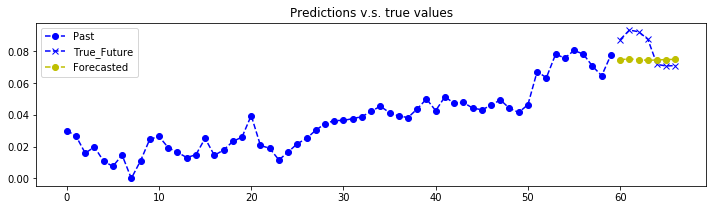

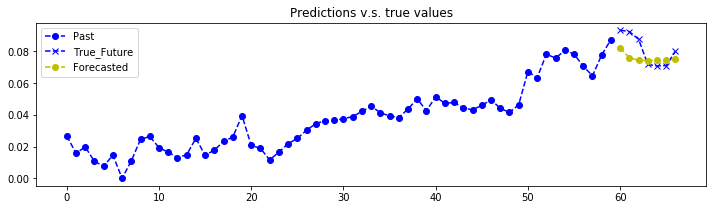

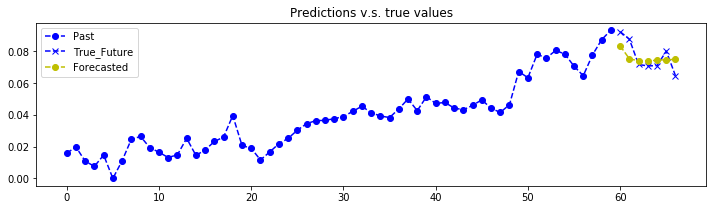

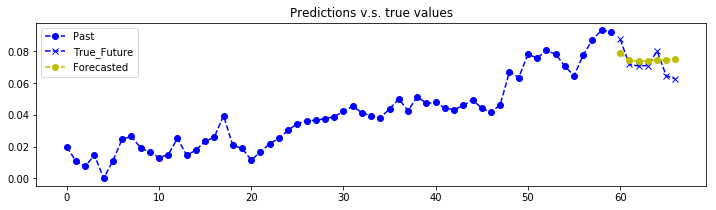

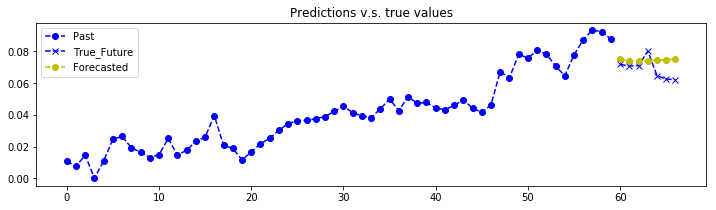

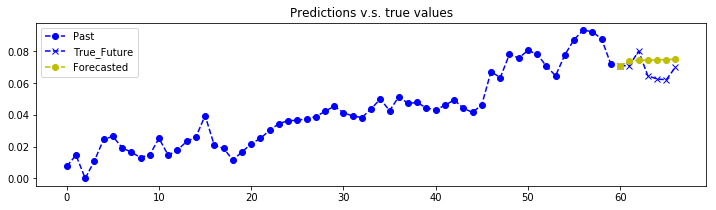

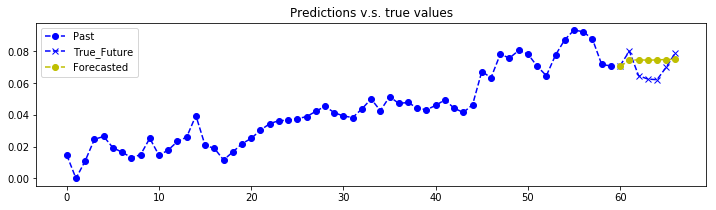

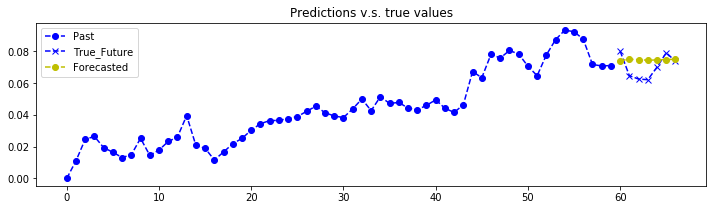

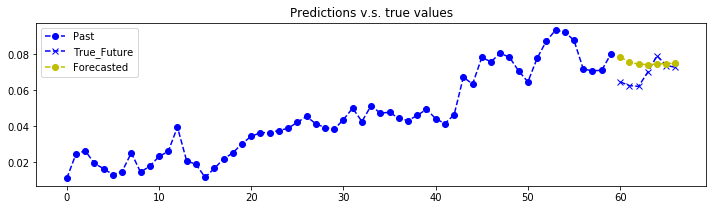

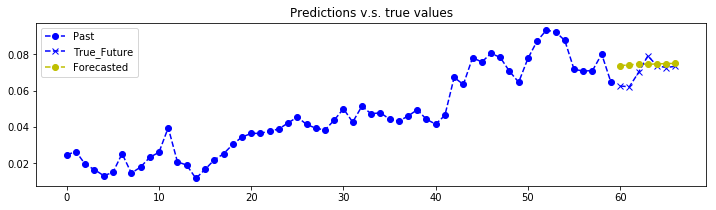

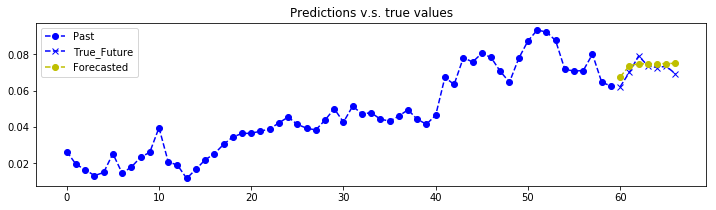

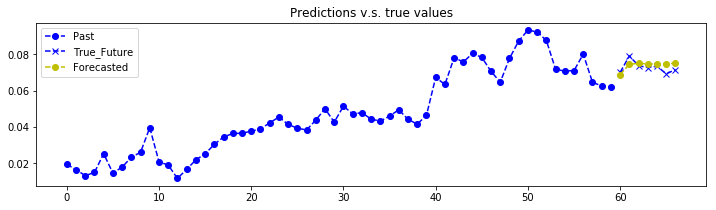

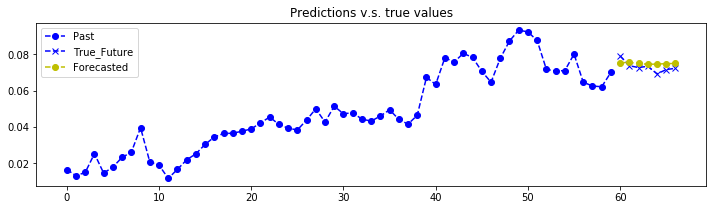

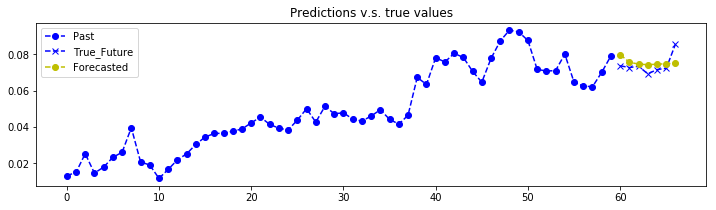

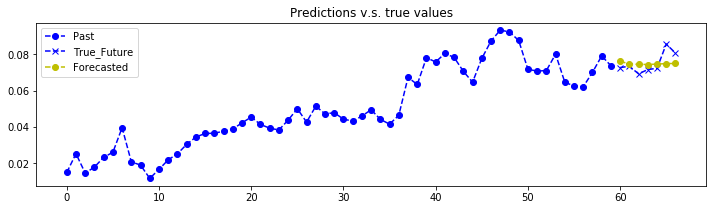

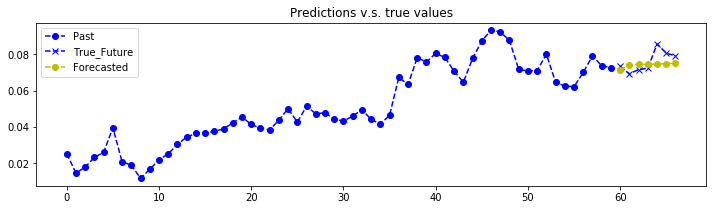

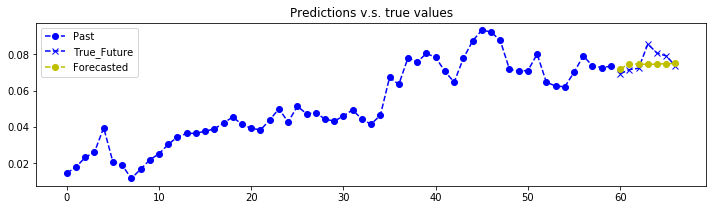

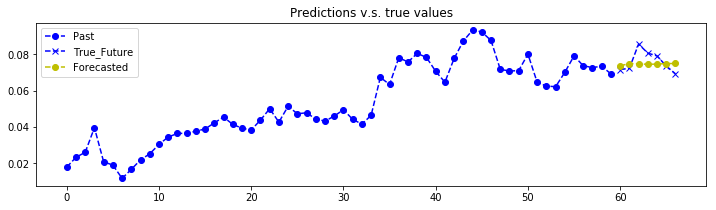

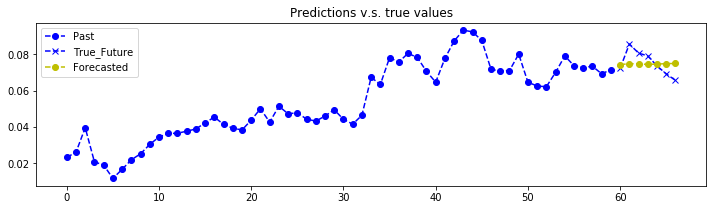

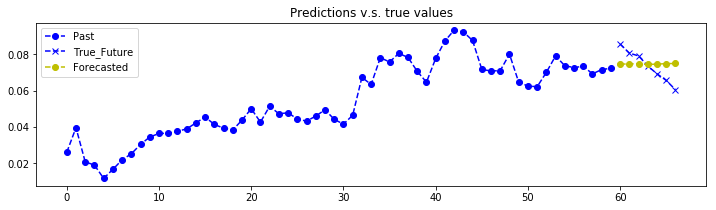

In [8]:
mlseq.plot_Training_Predictions(isRescale=False)

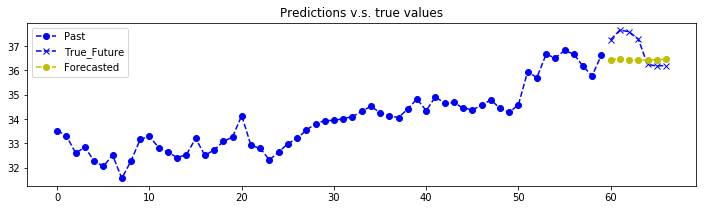

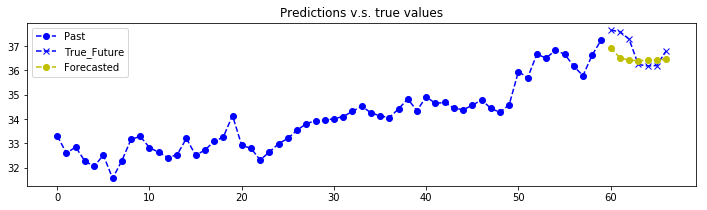

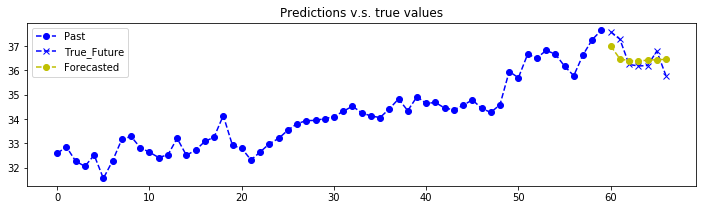

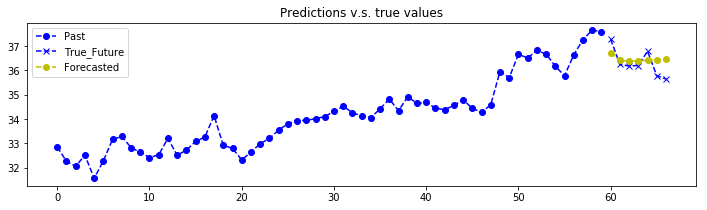

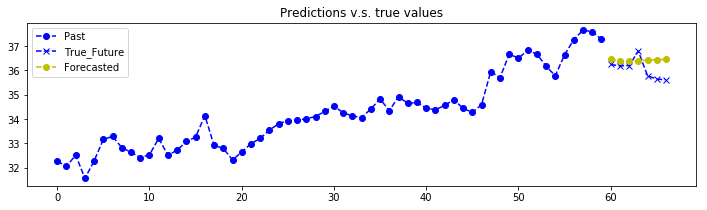

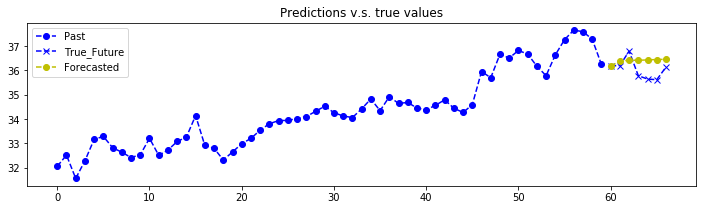

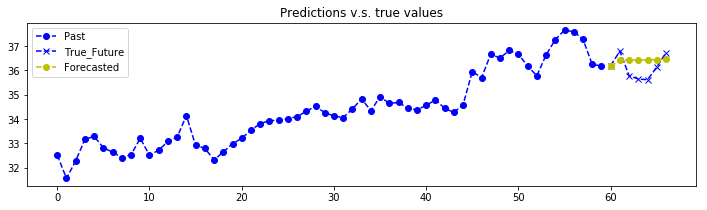

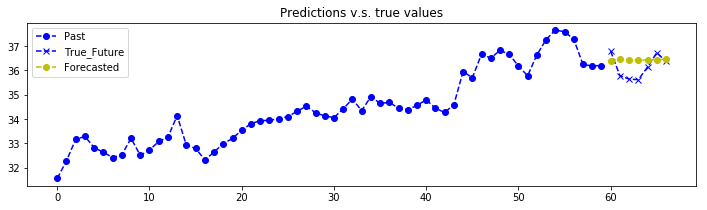

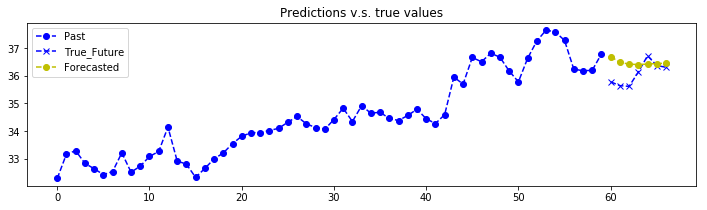

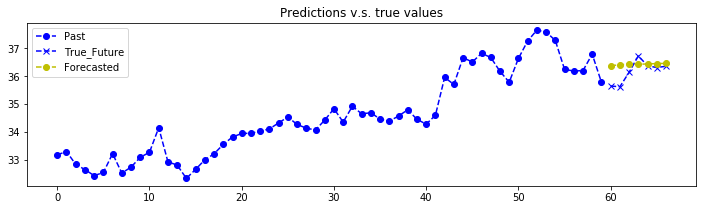

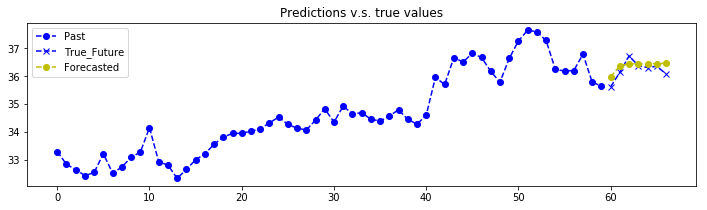

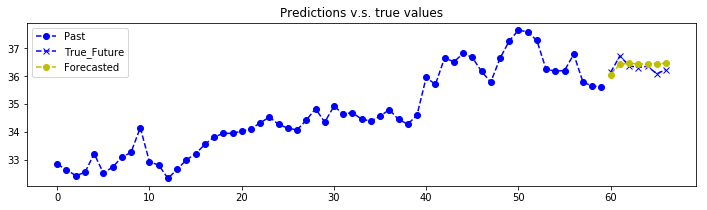

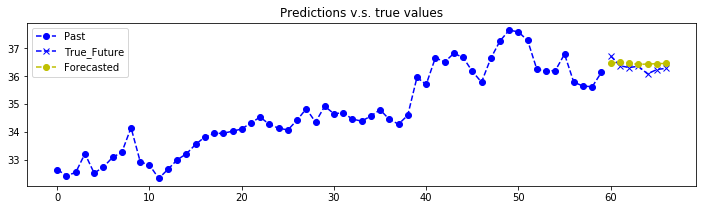

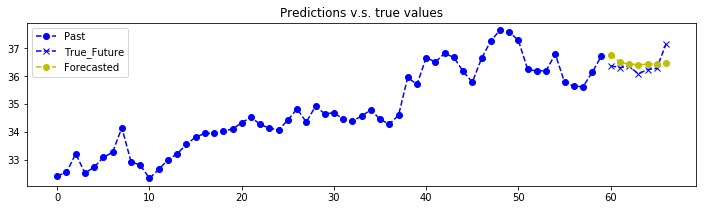

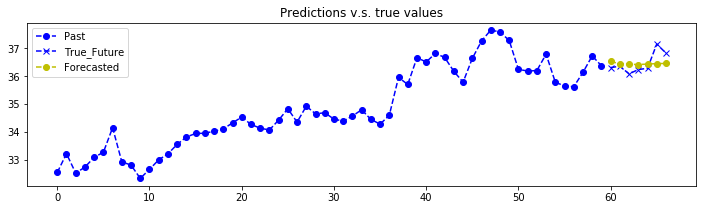

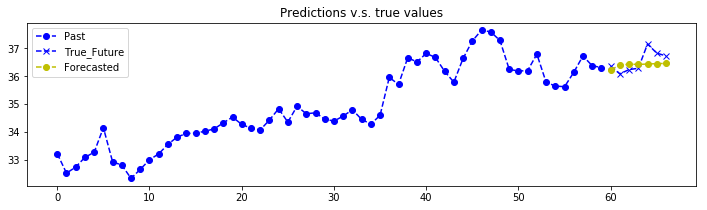

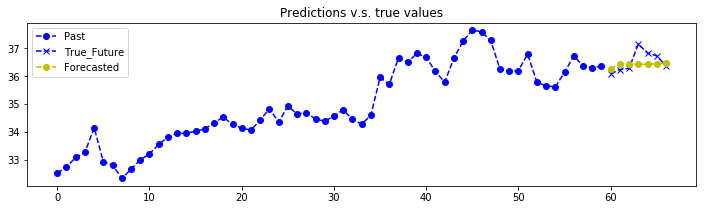

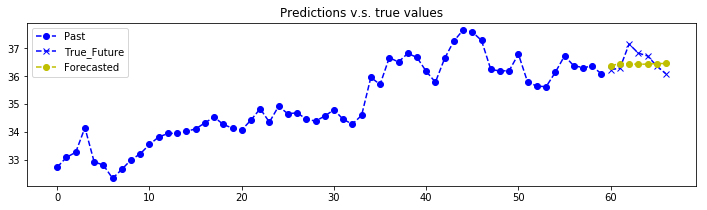

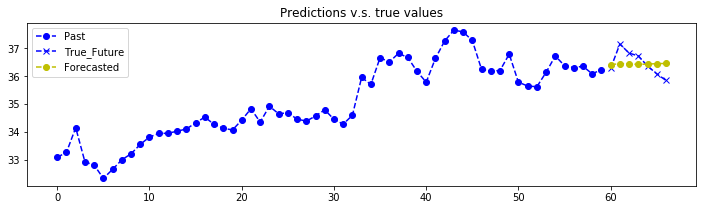

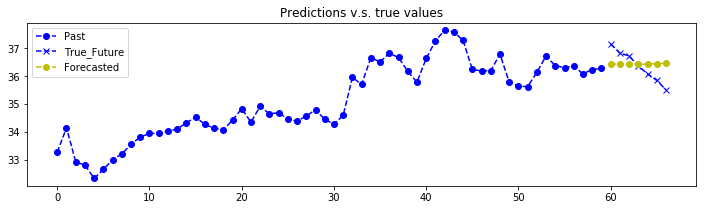

In [9]:
mlseq.plot_Training_Predictions(isRescale=True)

In [ ]:
#PREDICT
[encoder_input, decoder_input], decoder_output = next(mlseq._generateTrainingData())
y_test_predicted = mlseq.model.predict([encoder_input, decoder_input])

inputs = encoder_input.shape[0]
for i in range(inputs):
    past = mlseq.scaler.inverse_transform(encoder_input[i])
    true = mlseq.scaler.inverse_transform(decoder_output[i])
    pred = mlseq.scaler.inverse_transform(y_test_predicted[i])
    #past = encoder_input[i]
    #true = decoder_output[i]
    #pred = y_test_predicted[i]
    
    from matplotlib import pyplot as plt
    plt.figure(figsize=(12, 3))

    plt.plot(range(len(past)), past, "o--b",label="Past")
    plt.plot(range(len(past),len(true)+len(past)), true, "x--b", label="True_Future")
    plt.plot(range(len(past), len(pred)+len(past)), pred, "o--y",label="Forecasted")

    plt.legend(loc='best')
    plt.title("Predictions v.s. true values")
    plt.show()

In [ ]:
encoder_input.shape[0]

In [ ]:
encoder_input[2].shape

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


x = np.arange(0,10*np.pi,0.3)   # start,stop,step
y = np.sin(x)

df = pd.DataFrame(y)
df.columns = ['close']

df.plot()
plt.show()

In [ ]:
mlseq = ML_Seq(input_sequence_length=70, output_sequence_length=30, batch_size = 1)
mlseq.LoadSequenceData(df)
mlseq.series

train_data_generator = mlseq._generateTrainingData()

In [ ]:
[encoder_input, decoder_input], decoder_output = next(train_data_generator)

In [ ]:
plt.plot(encoder_input[0])
plt.show()